In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools as it
from glob import glob
from matplotlib import pyplot as plt
from pymea import plotting
from pymea import matlab_compatibility as mc

In [3]:
data_path = '/home/sean/mea data/04/04_spk_freq_table.csv'
data_table = pd.read_csv(data_path)
time_vector = data_table['time'].map(mc.datetime_str_to_datetime)

In [4]:
def is_all(unit_name):
    return True

cond_filt = {
    'All': is_all
}

cat_table = plotting.construct_categorized_dataframe(data_table, cond_filt)
cat_table['spike_freq'] = cat_table['spike_freq']/60 # convert from spikes/1 minute to spikes/sec
cat_table['spike_freq'] = plotting.smooth(cat_table['spike_freq'], kernel_size=5) # smooth using a 5 minute kernel
ignore_small = cat_table.query('spike_freq > 0.05')

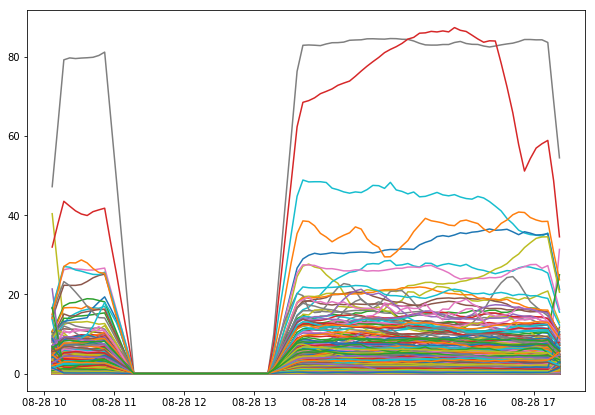

In [5]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces(cat_table)

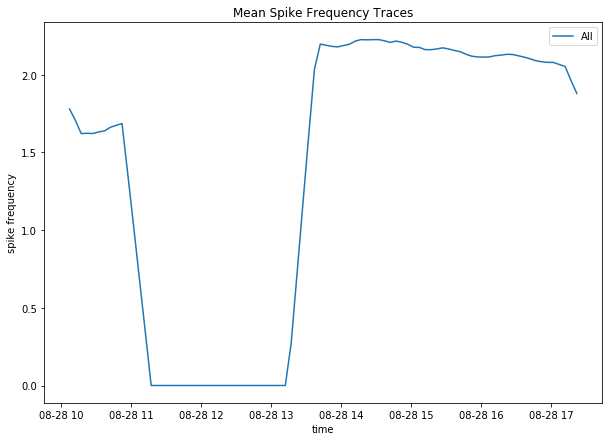

In [11]:
plt.figure(figsize=(10,7))
plotting.plot_mean_frequency_traces(cat_table)

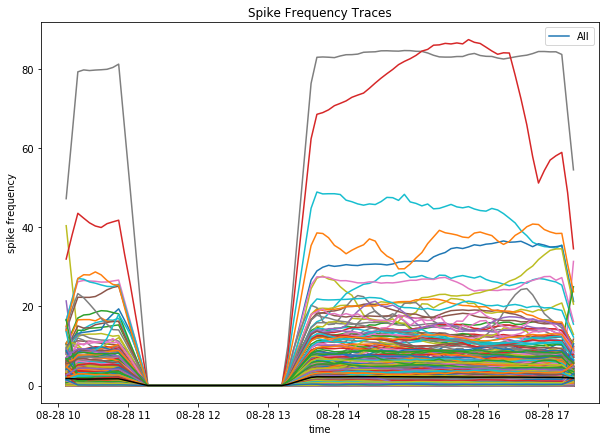

In [12]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces_plus_means(cat_table)